In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

## Pull data, and Clean it

1. Merge 12 months of sales data into a single data frame
2. Remove NAN observations
3. Change string types to numeric types in order to perform calcs
4. Add columns

In [2]:
def Get_Data():
    
    # Merge 12 months of sales data into a single file
    path = r'./Raw_Data/'                    
    all_files = glob.glob(os.path.join(path, "Sales_*.csv"))    

    df_from_each_file = (pd.read_csv(f) for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    
    ## Clean the data ##
    # Fix nan
    df = df.dropna(how='all') # if all cols are NAN
    # find 'or' values
    df = df[df['Order Date'].str[0:2] != 'Or']
    
    # Fix Data types
    df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
    df["Price Each"] = pd.to_numeric(df["Price Each"])
    
    ## Add Columns ##
    df['Month'] = df["Order Date"].str[0:2]
    df['Month'] = df['Month'].astype('int32')
    df['Sales'] = df['Quantity Ordered'] * df['Price Each']
    # RegEx to return string between 2 specific characters (,) 
    df['City'] = df['Purchase Address'].str.extract(r",(.*),", expand=True)
    
    return df


In [3]:
df = Get_Data()

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


### What was the best month for sales? How much was earned that month

In [5]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [6]:
res = df.groupby('Month').sum()

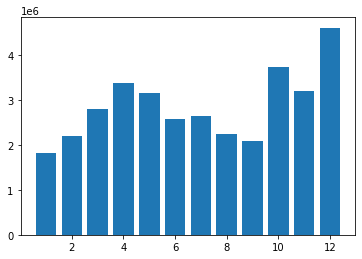

In [7]:
months = range(1,13)

plt.bar(months, res['Sales'])
plt.show()

### What City had the highest number of sales

In [8]:
df.groupby('City')['Sales'].sum()

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

<AxesSubplot:ylabel='City'>

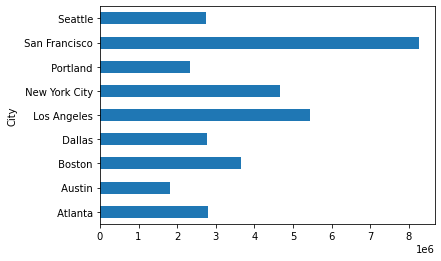

In [9]:
df.groupby('City')['Sales'].sum().plot(kind='barh')

Text(0.5, 0, 'Sales in Millions')

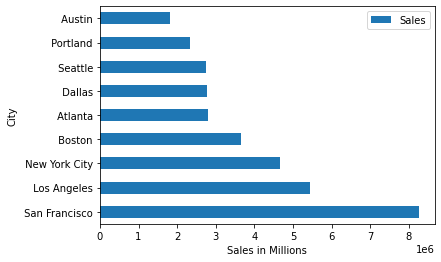

In [10]:
# reset the index: the old index is added as a column, and a new sequential index is used
df_flat = df.groupby('City')['Sales'].sum().reset_index()

# sort it by Global_Sales, and make a horizontal bar plot.
ax = df_flat.sort_values(['Sales'], ascending=False).plot(kind='barh', y='Sales', x='City')
ax.set_ylabel("City")
ax.set_xlabel("Sales in Millions")